In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from google.colab import files
load= files.upload()

Saving reviews_1500_end.csv to reviews_1500_end.csv


In [53]:
df=pd.read_csv('reviews_1500_end.csv')
df

<ipython-input-53-5c017d95020e>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('reviews_1500_end.csv')


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49973,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49974,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
49975,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


In [54]:
df.shape

(49977, 19)

In [55]:
df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [56]:
df.isna().sum()

Unnamed: 0                      0
author_id                       0
rating                          0
is_recommended               3817
helpfulness                 13455
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                    59
review_title                14378
skin_tone                    7201
eye_color                    6260
skin_type                    3631
hair_color                   8851
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [57]:
df = df[['review_text','is_recommended','rating']]
df

,review_text,is_recommended,rating
0,I absolutely L-O-V-E this oil. I have acne pro...,1.0,5
1,I gave this 3 stars because it give me tiny li...,1.0,3
2,Works well as soon as I wash my face and pat d...,1.0,5
3,"this oil helped with hydration and breakouts, ...",1.0,5
4,This is my first product review ever so that s...,1.0,5
...,...,...,...
49972,Consider salicylic acid your secret weapon for...,1.0,5
49973,I’ve been using this as my only moisturizer fo...,1.0,5
49974,I got breakouts whenever it’s my time of month...,1.0,5
49975,I love this!!! I don’t get actual acne just an...,1.0,5


In [58]:
  df.rename(columns={'is_recommended':'label','review_text':'text'},inplace=True)
  df

<ipython-input-58-6f12a06cc80f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'is_recommended':'label','review_text':'text'},inplace=True)


,text,label,rating
0,I absolutely L-O-V-E this oil. I have acne pro...,1.0,5
1,I gave this 3 stars because it give me tiny li...,1.0,3
2,Works well as soon as I wash my face and pat d...,1.0,5
3,"this oil helped with hydration and breakouts, ...",1.0,5
4,This is my first product review ever so that s...,1.0,5
...,...,...,...
49972,Consider salicylic acid your secret weapon for...,1.0,5
49973,I’ve been using this as my only moisturizer fo...,1.0,5
49974,I got breakouts whenever it’s my time of month...,1.0,5
49975,I love this!!! I don’t get actual acne just an...,1.0,5


In [60]:
df['label'].value_counts()

1.0    37543
0.0     8617
Name: label, dtype: int64

In [61]:
print('Positive',round(df['label'].value_counts()[1]/len(df)*100,2),"%")
print('Negative',round(df['label'].value_counts()[0]/len(df)*100,2),"%")

Positive 75.12 %
Negative 17.24 %


In [43]:
#El dataset esta desbalanceado por lo que probamos incluyendo otro dataset
from google.colab import files
load= files.upload()




Saving reviews_750_1000.csv to reviews_750_1000.csv


In [62]:
df2=pd.read_csv('reviews_750_1000.csv')
df2

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,NaN,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,NaN,NaN,NaN,NaN,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116257,116257,7549964033,3,0.0,1.0,2,0,2,2022-11-24,"Cute packaging, innovative component. The prod...",Can live without it,NaN,brown,oily,NaN,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116258,116258,22017857232,5,1.0,1.0,1,0,1,2022-11-24,"I am obsessed with this intensive lip mask, do...",Loveeee!,fair,brown,dry,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116259,116259,30329641422,5,1.0,NaN,0,0,0,2022-11-24,After using this product from a free sample pr...,Best Lip Mask Ever!,lightMedium,blue,normal,blonde,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
116260,116260,34099439981,5,1.0,NaN,0,0,0,2022-11-24,Plum and plush my lips are. These don’t necess...,Plush pudding makes me lips look so smooth,NaN,brown,combination,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0


In [64]:
df2 = df2[['review_text','is_recommended','rating']]
df2

,review_text,is_recommended,rating
0,These are the only pimple patches I’ve used th...,1.0,5
1,One of my ingrown hair turned inflamed and sor...,1.0,4
2,I have tried 10 different acne/blemish patches...,1.0,5
3,"Love these for my mid-size breakouts, specifyi...",1.0,4
4,Best so far - though still not particularly ef...,1.0,4
...,...,...,...
116257,"Cute packaging, innovative component. The prod...",0.0,3
116258,"I am obsessed with this intensive lip mask, do...",1.0,5
116259,After using this product from a free sample pr...,1.0,5
116260,Plum and plush my lips are. These don’t necess...,1.0,5


In [65]:
  df2.rename(columns={'is_recommended':'label','review_text':'text'},inplace=True)
  df2

<ipython-input-65-c7f135aa1632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'is_recommended':'label','review_text':'text'},inplace=True)


,text,label,rating
0,These are the only pimple patches I’ve used th...,1.0,5
1,One of my ingrown hair turned inflamed and sor...,1.0,4
2,I have tried 10 different acne/blemish patches...,1.0,5
3,"Love these for my mid-size breakouts, specifyi...",1.0,4
4,Best so far - though still not particularly ef...,1.0,4
...,...,...,...
116257,"Cute packaging, innovative component. The prod...",0.0,3
116258,"I am obsessed with this intensive lip mask, do...",1.0,5
116259,After using this product from a free sample pr...,1.0,5
116260,Plum and plush my lips are. These don’t necess...,1.0,5


In [66]:
df2['label'].value_counts()

1.0    88410
0.0    16049
Name: label, dtype: int64

In [68]:
print('Positive',round(df2['label'].value_counts()[1]/len(df2)*100,2),"%")
print('Negative',round(df2['label'].value_counts()[0]/len(df2)*100,2),"%")

Positive 76.04 %
Negative 13.8 %


In [69]:
df_concat=pd.concat([df,df2],axis=0)
df_concat

,text,label,rating
0,I absolutely L-O-V-E this oil. I have acne pro...,1.0,5
1,I gave this 3 stars because it give me tiny li...,1.0,3
2,Works well as soon as I wash my face and pat d...,1.0,5
3,"this oil helped with hydration and breakouts, ...",1.0,5
4,This is my first product review ever so that s...,1.0,5
...,...,...,...
116257,"Cute packaging, innovative component. The prod...",0.0,3
116258,"I am obsessed with this intensive lip mask, do...",1.0,5
116259,After using this product from a free sample pr...,1.0,5
116260,Plum and plush my lips are. These don’t necess...,1.0,5


In [71]:
df_concat['label'].value_counts()

1.0    125953
0.0     24666
Name: label, dtype: int64

In [72]:
print('Positive',round(df_concat['label'].value_counts()[1]/len(df_concat)*100,2),"%")
print('Negative',round(df_concat['label'].value_counts()[0]/len(df_concat)*100,2),"%")

Positive 75.77 %
Negative 14.84 %


In [77]:

df_neg = df_concat[df_concat['label'] == 0]
df_neg.label.value_counts()



0.0    24666
Name: label, dtype: int64

In [78]:
#balanceamos el data set reduciendo la cantidad de datos positivos

df_pos=df_concat[df_concat['label']==0].sample(len(df_neg))
df_pos.label.value_counts()

0.0    24666
Name: label, dtype: int64

In [82]:
df_final = pd.concat([df_neg,df_pos],axis=0)
df_final

,text,label,rating
18,"It works well as a moisturizing oil, but it di...",0.0,2
143,I couldn’t believe the price on this product. ...,0.0,4
157,I was super excited to try this as I received ...,0.0,3
173,I received a full sized sample of the Lancome ...,0.0,3
218,"This is a nice product, but was overall not a ...",0.0,3
...,...,...,...
33417,"I like the applicator, it feels very cool and ...",0.0,3
60091,"This cream contains hydroxyacetophenone, which...",0.0,1
38215,I like Caudalie products. But I am disappointe...,0.0,2
86979,I would not reccomend this moisturizer. The mo...,0.0,2


In [86]:

#Aplicamos un shuffle al dataset
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final

,text,label,rating
0,Pump doesn’t work!! I tried two bottles and th...,0.0,1
1,I think there might be better clay masks out t...,0.0,3
2,I so badly wanted this product to work. Inwas ...,0.0,1
3,It didn’t do anything for under my eye. I’ve ...,0.0,1
4,Meh. It’s been 4 months and I’ve not noticed ...,0.0,1
...,...,...,...
49327,"Scent was alright, texture is hard to describe...",0.0,2
49328,Hi cannot get it to turn on. I want to keep so...,0.0,1
49329,I was incentives by influenster and dior in ex...,0.0,2
49330,This has a nice texture and is very moisturizi...,0.0,3


In [87]:
df_final.isnull().sum()

text      102
label       0
rating      0
dtype: int64

In [89]:
#Eliminamos las filas con nulos en la column 'text'
df_nonull=df_final.dropna(subset='text')
df_nonull

,text,label,rating
0,Pump doesn’t work!! I tried two bottles and th...,0.0,1
1,I think there might be better clay masks out t...,0.0,3
2,I so badly wanted this product to work. Inwas ...,0.0,1
3,It didn’t do anything for under my eye. I’ve ...,0.0,1
4,Meh. It’s been 4 months and I’ve not noticed ...,0.0,1
...,...,...,...
49327,"Scent was alright, texture is hard to describe...",0.0,2
49328,Hi cannot get it to turn on. I want to keep so...,0.0,1
49329,I was incentives by influenster and dior in ex...,0.0,2
49330,This has a nice texture and is very moisturizi...,0.0,3


In [138]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [154]:

#Procesamiento de texto

from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

def preprocess_text(text,remove_digits=True):
  #ingreso el texto con estructura html y lo convierto en texto
  text=BeautifulSoup(text,'html.parser').get_text()
  #borro los caracteres especiales
  text = re.sub('\[[^]]*\]', '', text)
  if remove_digits:
        text = re.sub('[^a-zA-Z\s]', '', text)
  else:
        text = re.sub('[^a-zA-Z0-9\s]', '', text)
  #quito las mayusculas
  text=text.lower()

  #Stemming (Unificar palabras con similares)
  ps=PorterStemmer()
  word_list= text.split()
  word_list_stem= [ps.stem(i) for i in word_list]
  text=' '.join(word_list_stem)

  #Elimino stopwords (palabras que no dicen nada)
  stopwords_list = set(stopwords.words('english'))
  word_list_sw= [i for i in word_list if i not in stopwords_list]
  text= ' '.join(word_list_sw)

  #tokenizer (Eliminar caracteres especiales, mayusc, etc)
  tokenizer= ToktokTokenizer()
  word_list_tok= tokenizer.tokenize(text)
  text=' '.join(word_list_tok)


  return text

In [155]:
#Probamos la funcion de procesamiento de texto

palabra ='Hideous.  So disappointed in Sephora!!!  Should be 0 Stars!'

preprocess_text(palabra)


'hideous disappointed sephora stars'

In [156]:
#Aplicamos la funcion de preprocesamiento al dataset
df_nonull['text']=df_nonull['text'].apply(preprocess_text)
df_nonull

,text,label,rating
0,pump doesnt work tried two bottles broke half ...,0.0,1
1,think might better clay masks doesnt seem much...,0.0,3
2,badly wanted product work inwas really excited...,0.0,1
3,didnt anything eye ive using month initially f...,0.0,1
4,meh months ive noticed results get far better ...,0.0,1
...,...,...,...
49327,scent alright texture hard describe almost lik...,0.0,2
49328,hi cannot get turn want keep need figure send ...,0.0,1
49329,incentives influenster dior exchange honest re...,0.0,2
49330,nice texture moisturizing unfortunately irrita...,0.0,3


In [157]:
#Modelo
#Separamos 10% para Test

from sklearn.model_selection import train_test_split

train_df,test_df= train_test_split(df_nonull,random_state=42,test_size=0.1,shuffle=True)

In [158]:
#Separamos 25% del Dataframe de entrenamiento para validacion
train_df,val_df= train_test_split(train_df,random_state=42,test_size=0.25)

In [189]:
!pip uninstall keras
!pip uninstall tensorflow
!pip install keras
!pip install tensorflow

Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.12.0
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled tensorflow-2.12.0
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.2 MB/s eta 0:00:00
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


In [206]:

from tensorflow import keras
import tensorflow as tf


import tensorflow_hub as hub
from keras import optimizers
from tensorflow.keras.optimizers import Adam


import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

#Aplicamos el modelo TF2.0 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'

url_modelo='https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'

def train_and_evaluate_model(url_modelo,embed_size,name,trainable=False):
  hub_layer=hub.KerasLayer(url_modelo,input_shape=[],output_shape=[embed_size],dtype=tf.string,trainable=trainable)

  #creacion del modelo
  model = tf.keras.models.Sequential([hub_layer,
      tf.keras.layers.Dense(256, activation = 'relu'),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')])
  #Tambien se podria hacer de la siguiente forma:
  #model = keras.Sequential()
  #model.add(hub_layer)
  #model.add(keras.layers.Dense(16, activation='relu'))
  #model.add(keras.layers.Dense(1, activation='sigmoid'))

  #Compilacion del modelo
  model.compile(optimizer= Adam(learning_rate=0.001),
                loss=tf.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
  model.summary()

  #Entrenamiento del modelo
  history= model.fit(train_df['text'],train_df['label'],epochs=100,batch_size=32,validation_data=(val_df['text'],val_df['label']),
                     callbacks=[tfdocs.modeling.EpochDots(),tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min')],
                     verbose=0)

  return history








In [204]:
histories = {}

In [207]:
histories['gnews-swivel-20dim'] = train_and_evaluate_model(url_modelo, embed_size = 20, name = 'gnews-swivel-20dim')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_18 (KerasLayer)  (None, 20)               400020    
                                                                 
 dense_53 (Dense)            (None, 256)               5376      
                                                                 
 dense_54 (Dense)            (None, 64)                16448     
                                                                 
 dense_55 (Dense)            (None, 1)                 65        
                                                                 
Total params: 421,909
Trainable params: 21,889
Non-trainable params: 400,020
_________________________________________________________________

Epoch: 0, accuracy:1.0000,  loss:0.0019,  val_accuracy:1.0000,  val_loss:0.0000,  
..........................................................................................

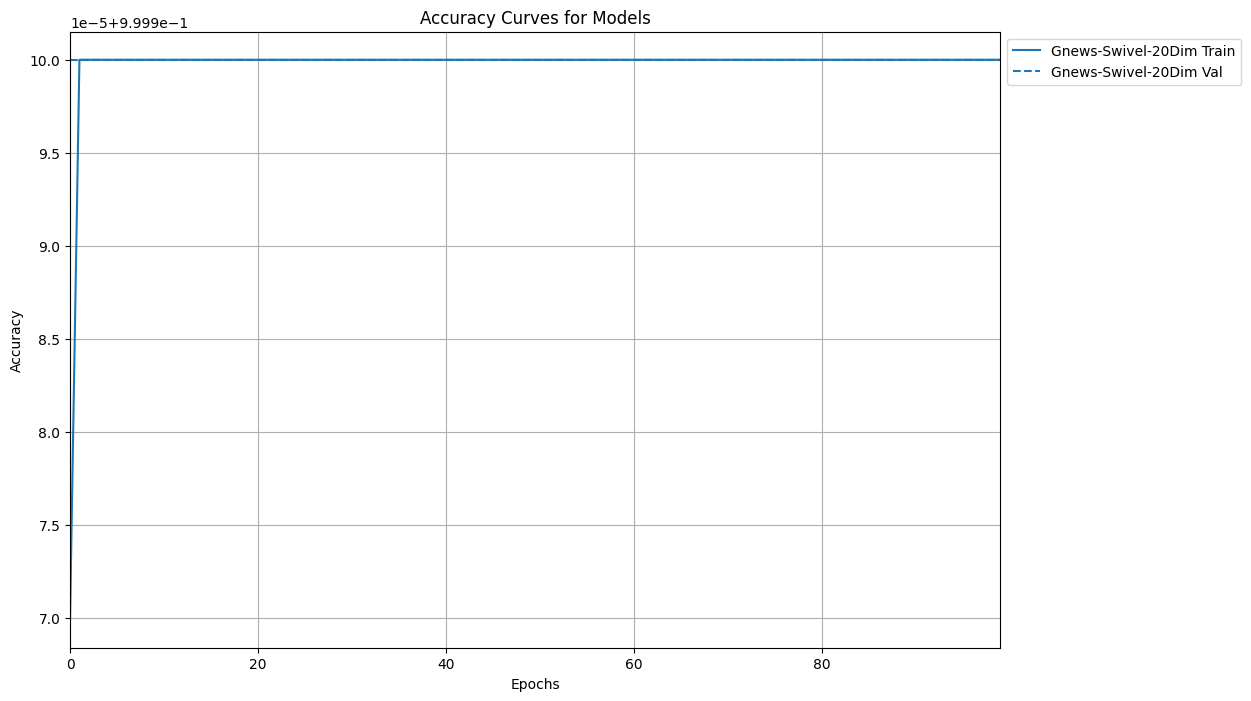

In [214]:
plt.rcParams['figure.figsize']=(12,8)

plotter = tfdocs.plots.HistoryPlotter(metric='accuracy')

plotter.plot(histories)

plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")

plt.show()

In [216]:
#Finetuning model(Aplicamos un ajuste fino para mejorar el modelo)

histories['gnews-swivel-20dim_finetuned'] = train_and_evaluate_model(url_modelo, embed_size = 20, name = 'gnews-swivel-20dimfinetuned', trainable = True)


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_19 (KerasLayer)  (None, 20)               400020    
                                                                 
 dense_56 (Dense)            (None, 256)               5376      
                                                                 
 dense_57 (Dense)            (None, 64)                16448     
                                                                 
 dense_58 (Dense)            (None, 1)                 65        
                                                                 
Total params: 421,909
Trainable params: 421,909
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, accuracy:0.9998,  loss:0.0020,  val_accuracy:1.0000,  val_loss:0.0000,  
...............................................................................................

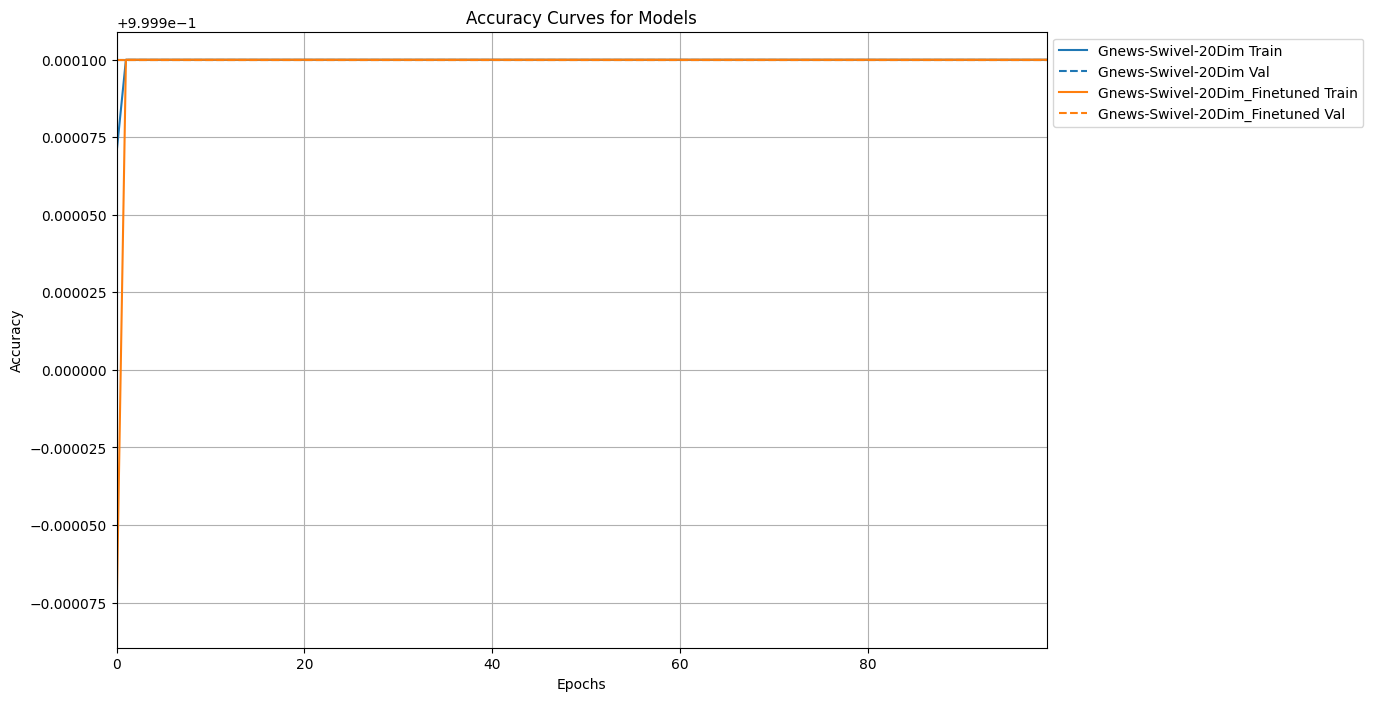

In [217]:
plt.rcParams['figure.figsize'] = (12, 8)
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy')
plotter.plot(histories)
plt.xlabel("Epochs")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Accuracy Curves for Models")
plt.show()